*Topics in Data Science 2 (TDS2) WS22/23*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a model on this data, and deploy it!

## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


You can get an inspiration from https://huggingface.co/gradio or these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Collect the data

Now you need to collect the data that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data :) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from fastai.vision.all import *
from fastdownload import download_url

In [6]:
%cd /content/drive/MyDrive
%pwd

/content/drive/MyDrive


'/content/drive/MyDrive'

In [20]:
# Your code goes here

import requests
import re
import json
from fastcore.foundation import L

def search_images_ddg(key,max_n=250):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
    (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api and 
    https://github.com/fastai/fastbook/blob/master/utils.py)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0',
                 'referer': 'https://duckduckgo.com/'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass

In [21]:
ims = search_images_ddg('Hefeweizen')
len(ims)

225

The next steps are:

1. Prepare the data
2. Train the model (using skearn, )
3. Evaluate the model
4. Build a web app (e.g. using gradio)

Have fun!!

In [11]:
%cd content/myDrive

[Errno 2] No such file or directory: 'content/myDrive'
/content/drive/MyDrive


In [36]:
bier_sorten = 'Hefeweizen','Kristallweizen','Radler', 'Helles', 'Pils', 'Starkbier'
path = Path('biersorten')

In [26]:
# Your code goes here

if not path.exists(): path.mkdir()
for b in bier_sorten:
    dest = (path/b)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{b} im Glas eingeschenkt')
    download_images(dest, urls=results)

In [52]:
fns = get_image_files(path)
fns

(#423) [Path('biersorten/Hefeweizen/cc1c7d5f-206b-4575-9d41-32be38ba740e.jpg'),Path('biersorten/Hefeweizen/13f11754-07a8-47b4-a5c3-f4b9e5e9b8b2.jpg'),Path('biersorten/Hefeweizen/9aba2e52-b2f6-4b03-ae44-771b244238ba.png'),Path('biersorten/Hefeweizen/3c77a9c3-0870-40e6-9d9c-2d8ad6a2d960.jpg'),Path('biersorten/Hefeweizen/0c399fb0-f282-4dc4-8236-7b87fbd85aaa.jpg'),Path('biersorten/Hefeweizen/018731c8-8a60-4500-aea0-e5d8ce339042.jpg'),Path('biersorten/Hefeweizen/65b84cee-c104-4956-b196-080d80a62e04.jpg'),Path('biersorten/Hefeweizen/a629cb0b-c714-45db-ba0b-4c60c2e1ed2f.jpg'),Path('biersorten/Hefeweizen/290e9fb7-4b4c-40a0-8b07-eea79caa9f43.jpg'),Path('biersorten/Hefeweizen/00d5293f-3ff4-4d54-b665-7f5d300c135b.png')...]

In [53]:
failed = verify_images(fns)
failed 

(#0) []

In [54]:
failed.map(Path.unlink)

(#0) []

In [55]:
biere = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [56]:
dls = biere.dataloaders(path)

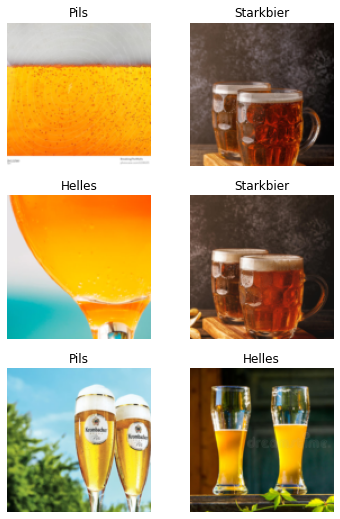

In [57]:
dls.train.show_batch(max_n=6, nrows=3)

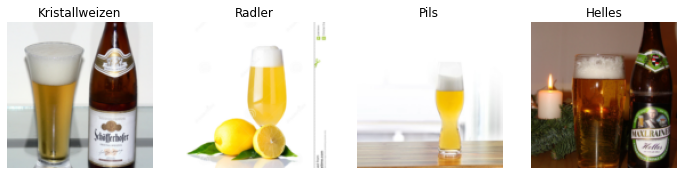

In [58]:
dls.valid.show_batch(max_n=4, nrows=1)

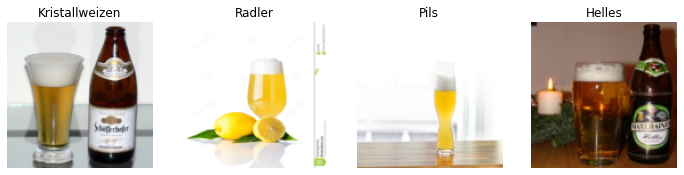

In [59]:
biere = biere.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = biere.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#eventuell Data Augementation hinzufügen

In [60]:
bier = biere.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = biere.dataloaders(path)

In [73]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs = 4, freeze_epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,3.033399,2.221109,0.566265,00:11


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.292477,1.646888,0.518072,00:12
1,1.980623,1.452380,0.493976,00:11
2,1.785181,1.401616,0.445783,00:11
3,1.625518,1.404994,0.457831,00:12


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should b

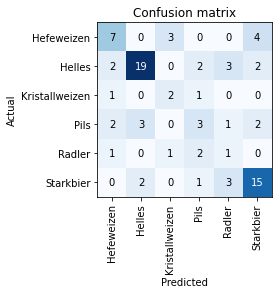

In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

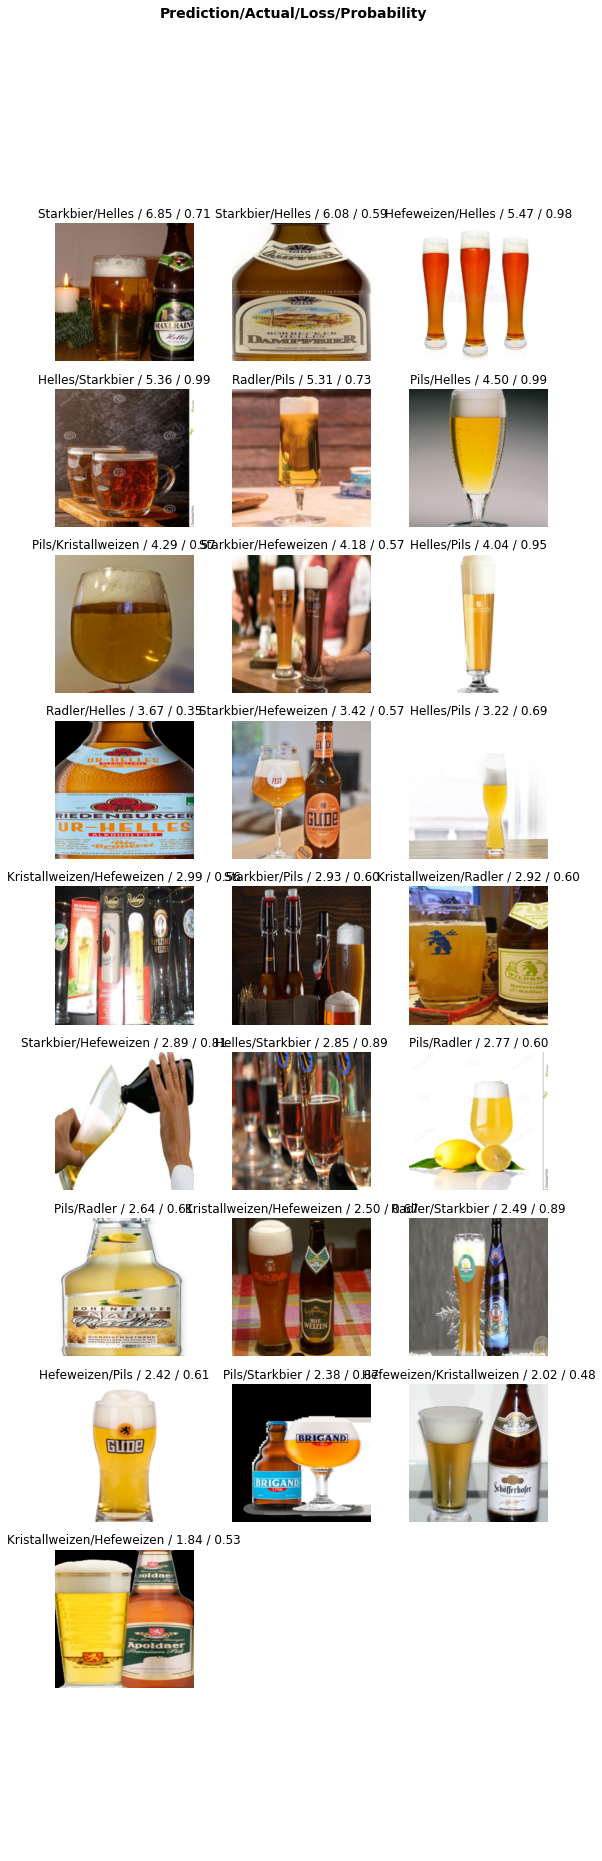

In [72]:
interp.plot_top_losses(25, nrows=10)

In [74]:
learn.export()

In [75]:
path.ls?

In [76]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [77]:
learn_inf = load_learner(path/'export.pkl')

In [78]:
learn_inf.predict(img_path)

('Kristallweizen',
 TensorBase(2),
 TensorBase([0.1096, 0.0014, 0.3374, 0.2284, 0.0611, 0.2622]))

In [79]:
learn_inf.dls.vocab

['Hefeweizen', 'Helles', 'Kristallweizen', 'Pils', 'Radler', 'Starkbier']

App mit Gratio entwicklen

In [80]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 5.1 MB/s 
     |████████████████████████████████| 2.3 MB 67.5 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 106 kB 71.3 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 278 kB 75.3 MB/s 
     |████████████████████████████████| 64 kB 3.8 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=1ec9fa6a8effd0db5f6e740401b291715b2793c19c7ce01fc0b324700d940bb0
  Stored in direc

In [81]:
import gradio as gr

In [82]:
labels = learn_inf.dls.vocab
def predict(biersorte_bild):
    biersorte_bild = PILImage.create(biersorte_bild)
    pred,pred_idx,probs = learn_inf.predict(biersorte_bild)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [83]:
gr_interface = gr.Interface(fn=predict, 
                            inputs=gr.Image(),
                            outputs=gr.Label(num_top_classes=len(labels)), 
                            interpretation="default")
gr_interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://cebc7c02-7795-4bba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
